In [94]:
import pandas as pd
import datetime as dt

df = pd.read_csv("../src/filter_scrap_data/valid_data/2020-11-01.csv")
df2 = pd.DataFrame({'period': [], 'pos': [], 'neg': [], 'neu': [], 'sum': []})

for i in df.iloc:
    now = dt.datetime.now()
    min_diff = (now - dt.datetime.fromtimestamp(i.created_utc)).seconds / 60 / 24 # 1일 단위
    if (df2['period']==int(min_diff)).any():
        if i.title_vader>0.5:
            df2.loc[(df2['period']==int(min_diff)), 'pos'] += 1
        elif i.title_vader<-0.5:
            df2.loc[(df2['period']==int(min_diff)), 'neg'] += 1
        else:
            df2.loc[(df2['period']==int(min_diff)), 'neu'] += 1
    else:
        df2 = df2.append({'period': int(min_diff), 'pos': 0, 'neg': 0, 'neu': 0, 'sum': 0} , ignore_index=True)
df2['sum'] =(df2['pos'] + df2['neg'] + df2['neu'])
df2 = df2.sort_values(by='period', ascending=True)
df2 = df2.set_index('period')
print(df2.head(100))

         pos   neg    neu    sum
period                          
0.0     17.0  10.0   82.0  109.0
1.0     12.0   2.0   74.0   88.0
2.0     19.0   4.0  123.0  146.0
3.0     10.0   4.0   98.0  112.0
4.0     14.0   4.0   96.0  114.0
5.0     15.0   7.0   75.0   97.0
6.0     11.0   9.0   82.0  102.0
7.0     13.0  11.0   71.0   95.0
8.0     10.0   4.0   54.0   68.0
9.0      7.0   4.0   51.0   62.0
10.0    18.0   2.0  113.0  133.0
11.0    13.0   1.0   44.0   58.0
12.0    18.0   2.0   67.0   87.0
13.0    14.0   5.0   65.0   84.0
14.0    10.0  10.0   74.0   94.0
15.0    12.0   7.0   72.0   91.0
16.0    14.0   4.0   74.0   92.0
17.0    15.0  16.0   82.0  113.0
18.0    10.0   5.0   61.0   76.0
19.0    10.0   4.0   60.0   74.0
20.0    15.0  11.0   83.0  109.0
21.0    12.0  11.0   79.0  102.0
22.0    19.0   3.0   67.0   89.0
23.0    22.0   4.0   91.0  117.0
24.0    15.0   6.0   86.0  107.0
25.0    17.0  13.0  100.0  130.0
26.0    16.0   6.0   85.0  107.0
27.0    12.0   7.0  103.0  122.0
28.0    21

 일단 편의를 위해 20년 11월 data 사용함.
 1일 단위로 나누어서 pos, neg, neu, sum 컬럼의 df로 만듦.

In [95]:
df2['axis'] = df2['pos']/(df2['pos'] + df2['neg'])*100

print(df2['axis'].min())
print(df2['axis'].mean())
print(df2['axis'].max())

df2['axis'] -= 20
print(df2['axis'].min())
print(df2['axis'].mean())
print(df2['axis'].max())
print(df2['axis'])

48.38709677419355
71.13977401412693
92.85714285714286
28.38709677419355
51.13977401412692
72.85714285714286
period
0.0     42.962963
1.0     65.714286
2.0     62.608696
3.0     51.428571
4.0     57.777778
5.0     48.181818
6.0     35.000000
7.0     34.166667
8.0     51.428571
9.0     43.636364
10.0    70.000000
11.0    72.857143
12.0    70.000000
13.0    53.684211
14.0    30.000000
15.0    43.157895
16.0    57.777778
17.0    28.387097
18.0    46.666667
19.0    51.428571
20.0    37.692308
21.0    32.173913
22.0    66.363636
23.0    64.615385
24.0    51.428571
25.0    36.666667
26.0    52.727273
27.0    43.157895
28.0    45.625000
29.0    37.894737
30.0    44.000000
31.0    45.217391
32.0    50.370370
33.0    50.967742
34.0    55.000000
35.0    57.272727
36.0    59.166667
37.0    47.500000
38.0    55.862069
39.0    62.857143
40.0    51.111111
41.0    56.785714
42.0    54.418605
43.0    60.851064
44.0    43.157895
45.0    61.081081
46.0    50.588235
47.0    56.190476
48.0    42.068966
49.

 일단은 pos/(pos+neg)로.
 평균값이 71.13...이기에 일단 20을 빼서 결과출력.

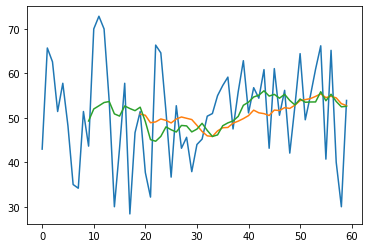

In [106]:
import matplotlib.pyplot as plt
import numpy as np

mov20 = df2['axis'].rolling(20).mean()
mov10 = df2['axis'].rolling(10).mean()
plt.plot(df2['axis'])
plt.plot(mov20)
plt.plot(mov10)


10일, 20일 이평

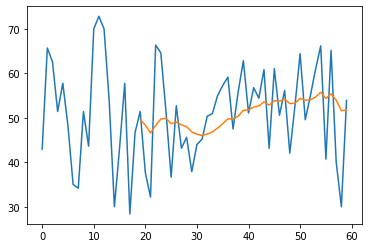

In [108]:
def weightedMean(weightArray):
    def inner(x):
        return (weightArray * x).mean()
    return inner

n = 10
t = [v for v in np.arange(1, n+1)]
sumv = sum(t) / n
wts = np.array(t) / sumv
wMov20 = df2['axis'].rolling(n).apply(weightedMean(wts), raw=True)
plt.plot(df2['axis'])
plt.plot(wMov20)

가중이평